In [38]:
#!pip install xgboost  

### 載入訓練數據

In [39]:
import pandas as pd
import numpy as np

def sin_transform(x):
    return np.sin(x/90*np.pi)

df = pd.read_csv("s_result_all_1000.csv", index_col=0)
X = df.drop(['0','1','2','3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '19'],axis='columns')     # 設置輸入變量
Y = df.loc[:, '0'].apply(sin_transform)
Y.head()

0    0.000000
1    0.034899
2    0.069756
3    0.104528
4    0.139173
Name: 0, dtype: float64

### 訓練模型

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
regr = DecisionTreeRegressor(max_depth=10) #6MB
#regr = RandomForestRegressor(max_depth=10, n_estimators=2) #155MB

#regr = GradientBoostingRegressor(learning_rate= 0.2,max_depth=6,subsample=0.7,n_estimators=20)#170kB
#regr = GradientBoostingClassifier(learning_rate= 0.2,max_depth=6,subsample=0.7,n_estimators=20)#170kB

regr.fit(X, Y)

DecisionTreeRegressor(max_depth=10)

### 保存模型

In [41]:
import pickle

# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'decision_tree_2.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(regr, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()


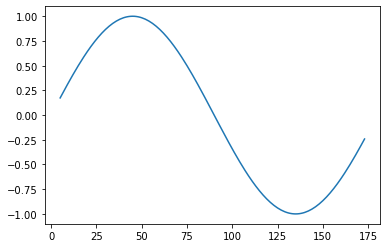

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
#print(np.around(regr_y_result))
plt.plot(Y[5:174])
